In [1]:
# --- 1. Imports ---
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import easyocr
import numpy as np

# --- 2. Cargar modelo YOLO ---
model = YOLO("/home/gnz/GitHub/yolo11_container/runs/detect/train/weights/best.pt")

# --- 3. Inicializar EasyOCR ---
reader = easyocr.Reader(['en','es'])  # podés agregar ['en', 'es'] si querés español


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


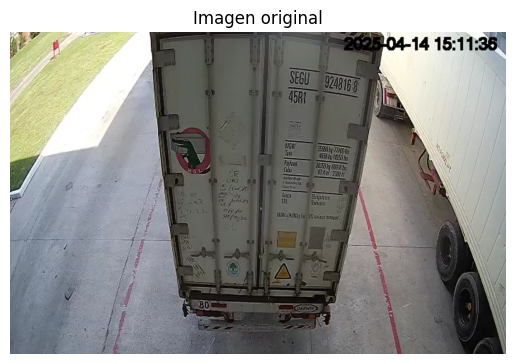

In [5]:
# --- 4. Cargar imagen de prueba ---
image_path = "/home/gnz/GitHub/yolo11_container/images/Captura de pantalla 2025-09-04 085434.png"   # poné acá tu imagen de contenedor
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # convertir a RGB
plt.imshow(image)
plt.title("Imagen original")
plt.axis("off")
plt.show()


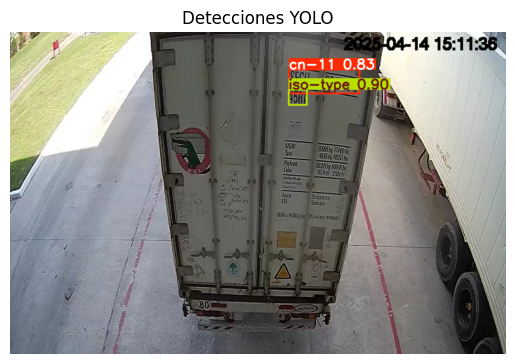

In [6]:
# --- 5. Inferencia con YOLO ---
results = model.predict(image, conf=0.25, verbose=False)
annotated = results[0].plot()  # imagen con bounding boxes dibujados

plt.imshow(annotated)
plt.title("Detecciones YOLO")
plt.axis("off")
plt.show()

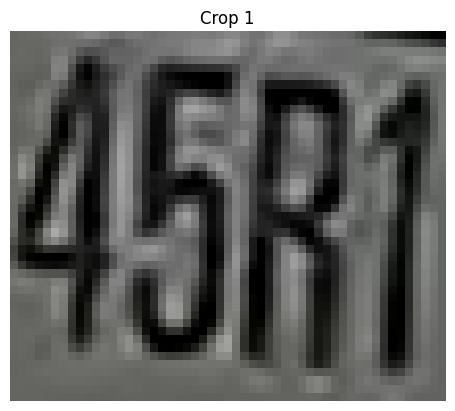

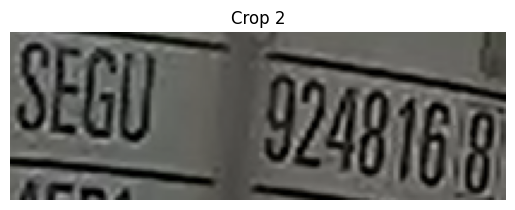

In [7]:
# --- 6. Generar crops de cada bounding box ---
crops = []
for i, box in enumerate(results[0].boxes):
    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
    crop = image[y1:y2, x1:x2]
    crops.append(crop)
    
    plt.imshow(crop)
    plt.title(f"Crop {i+1}")
    plt.axis("off")
    plt.show()


[Crop 1] Texto detectado: 45R1


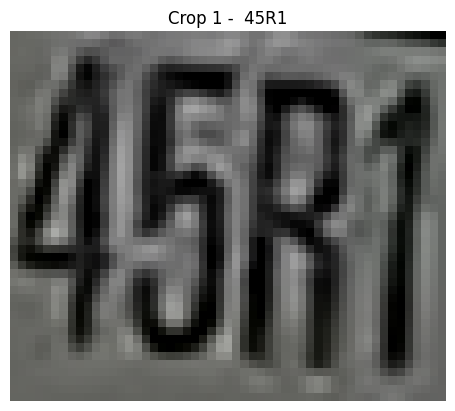

[Crop 2] Texto detectado: SeGO 9248768


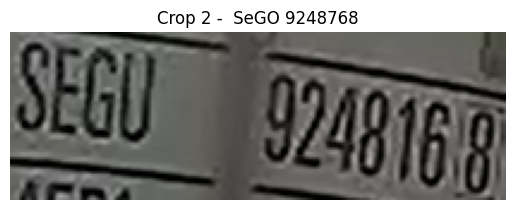

In [9]:
# --- 7. OCR sobre cada crop ---
for i, crop in enumerate(crops):
    ocr_result = reader.readtext(crop)
    if ocr_result:
        text = " ".join([res[1] for res in ocr_result])
    else:
        text = "(sin texto detectado)"
    
    print(f"[Crop {i+1}] Texto detectado: {text}")
    
    plt.imshow(crop)
    plt.title(f"Crop {i+1} -  {text}")
    plt.axis("off")
    plt.show()
